<h3>Imports</h3>

In [95]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Read data

In [96]:
data = pd.read_csv('IrisData.txt')

<h3>Task 1: Perceptron (Part 1)</h3>

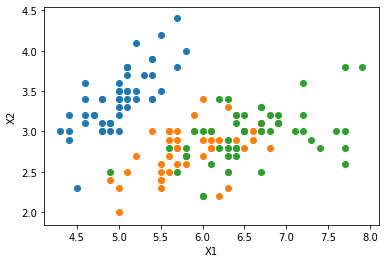

In [97]:
# Separating the columns
X1 = data['X1']
X2 = data['X2']
X3 = data['X3']
X4 = data['X4']
label = data['Class']

# Plotting X1 and X2
plt.figure('fig1')
plt.scatter(X1[:50], X2[:50])
plt.scatter(X1[51:100], X2[51:100])
plt.scatter(X1[101:], X2[101:])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

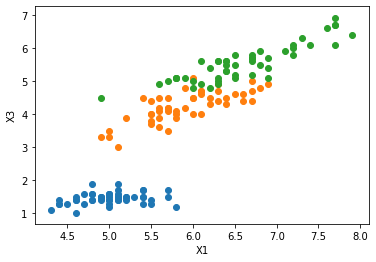

In [98]:
# Plotting X1 and X3
plt.figure('fig2')
plt.scatter(X1[:50], X3[:50])
plt.scatter(X1[51:100], X3[51:100])
plt.scatter(X1[101:], X3[101:])
plt.xlabel('X1')
plt.ylabel('X3')
plt.show()

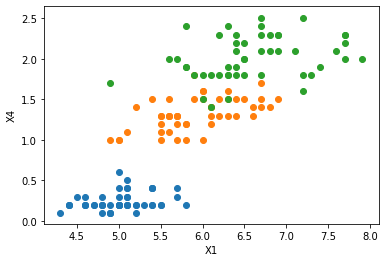

In [99]:
# Plotting X1 and X4
plt.figure('fig2')
plt.scatter(X1[:50], X4[:50])
plt.scatter(X1[51:100], X4[51:100])
plt.scatter(X1[101:], X4[101:])
plt.xlabel('X1')
plt.ylabel('X4')
plt.show()

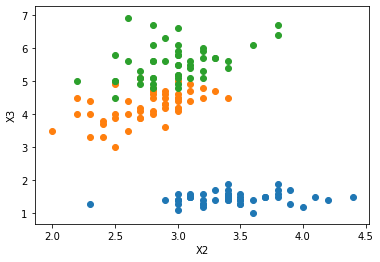

In [100]:
# Plotting X2 and X3
plt.figure('fig3')
plt.scatter(X2[:50], X3[:50])
plt.scatter(X2[51:100], X3[51:100])
plt.scatter(X2[101:], X3[101:])
plt.xlabel('X2')
plt.ylabel('X3')
plt.show()

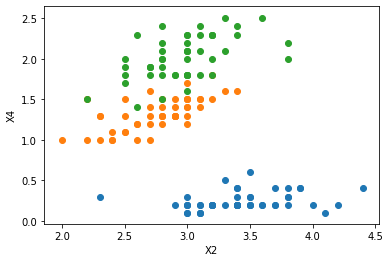

In [101]:
# Plotting X2 and X4
plt.figure('fig4')
plt.scatter(X2[:50], X4[:50])
plt.scatter(X2[51:100], X4[51:100])
plt.scatter(X2[101:], X4[101:])
plt.xlabel('X2')
plt.ylabel('X4')
plt.show()

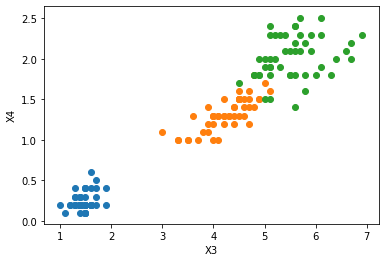

In [102]:
# Plotting X3 and X4
plt.figure('fig5')
plt.scatter(X3[:50], X4[:50])
plt.scatter(X3[51:100], X4[51:100])
plt.scatter(X3[101:], X4[101:])
plt.xlabel('X3')
plt.ylabel('X4')
plt.show()

<h3>Task 1: Perceptron (Part 2)</h3>

In [103]:
# Signum function
def signum(x):
    if x == 0:
        return 0
    if x > 0:
        return 1
    if x < 0:
        return -1

In [104]:
# Perceptron Implementation
# Input: data, feature1 name, feature2 name, class1 name, class2 name
# learning rate, epochs, use_bias (bool)
def perceptron(x_train, y_train, learning_rate, epochs, use_bias):
    w = np.random.rand(1, 3)[0] # 2 weights for 2 features + bias
    #w = np.reshape(w, newshape=(1, 3))
    if not use_bias:
        w.T[0] = 0
    for epoch in range(epochs):
        for i in range(len(x_train)):
            tmp_x = np.reshape(x_train[i], (3, 1))
            v = np.dot(w.T, tmp_x)
            y = signum(v)
            if y != y_train[i]:
                L = y_train[i] - y
                w = w + learning_rate * np.dot(L, tmp_x.T)
                if not use_bias:
                    w.T[0] = 0
    return w

<h3>Task 2: Adaline Learning Algorithm</h3>

In [105]:
def adaline(x_train, y_train, learning_rate, epochs, MSE_threshold, use_bias):
    w = np.random.rand(1, 3)[0] # 2 weights for 2 features + bias
    if not use_bias:
        w.T[0] = 0
    for epoch in range(epochs):
        for i in range(len(x_train)):
            tmp_x = np.reshape(x_train[i], (3, 1))
            evaluated_y = np.dot(w.T, tmp_x)
            error = y_train[i] - evaluated_y
            w = w + learning_rate * np.dot(error, tmp_x.T)
            if not use_bias:
                w.T[0] = 0
        error_for_all_samples = calculate_error(x_train, y_train, w)
        MSE = calculate_MSE(error_for_all_samples, len(x_train))
        if MSE <= MSE_threshold:
            break
    return w

In [106]:
def calculate_error(x_train, y_train, w):
    error = 0
    for i in range(len(x_train)):
        tmp_x = np.reshape(x_train[i], (3, 1))
        evaluated_y = np.dot(w.T, tmp_x)
        error += (0.5 * math.pow((y_train[i] - evaluated_y),2))
    return error

In [107]:
def calculate_MSE(error, samples_size):
    return error * (1/samples_size)

## Main functions

In [108]:
def test(x_test, y_test, w):
    v = np.dot(w.T, x_test.T)
    y_prediction = []
    for vi in v:
        y_prediction.append(signum(vi))
    accuracy = np.mean(y_prediction == y_test.flatten()) * 100
    return y_prediction, accuracy

In [109]:
def extract_data(x1, x2, c1, c2):
    data1 = None
    data2 = None
    data1_y = np.ones([50, 1])
    data2_y = np.ones([50, 1]) * -1
    x0 = np.ones([50, 1]) # feature 0 for bias

    if c1 == "Iris-setosa" or c2 == "Iris-setosa":
        data1 = np.append(x0, data[[x1, x2]][:50], axis = 1)
        if c1 == "Iris-versicolor" or c2 == "Iris-versicolor":
            data2 = np.append(x0, data[[x1, x2]][50:100], axis=1)
        else:
            data2 = np.append(x0, data[[x1, x2]][100:], axis=1)
    elif c1 == "Iris-versicolor" or c2 == "Iris-versicolor":
        data1 = np.append(x0, data[[x1, x2]][50:100], axis=1)
        data2 = np.append(x0, data[[x1, x2]][100:], axis=1)

    data_x = np.append(data1, data2, axis=0)
    data_y = np.append(data1_y, data2_y, axis=0)
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.4, shuffle=True, stratify = data_y)
    return x_train, y_train, x_test, y_test


In [110]:
def main(x1, x2, c1, c2, learning_rate, epochs, MSE_threshold, use_bias, model_name):
    if x1 == x2 or c1 == c2:
        print("You cannot select same feature/class twice")
        return

    x_train, y_train, x_test, y_test = extract_data(x1, x2, c1, c2)
    if model_name == "preceptron":
        w = perceptron(x_train, y_train, learning_rate, epochs, use_bias)
        plt.title('Preceptron of classes '+c1+' '+c2)
    else:
        if MSE_threshold is None:
            print("MSE_threshold cannot be empty")
            return
        w = adaline(x_train, y_train, learning_rate, epochs, MSE_threshold, use_bias)
        plt.title('Adaline of classes '+c1+' '+c2)

    # Task 3 & 4
    x = [min(x_test[:, 1]), max(x_test[:, 1])]
    y = [(-1 * w.T[1] * x[0] - w.T[0]) / w.T[2], (-1 * w.T[1] * x[1] - w.T[0]) / w.T[2]] 

    x1_c1 = []
    x2_c1 = []
    x1_c2 = []
    x2_c2 = []
    for i in range(len(x_test)):
        if y_test[i] == 1:
            x1_c1.append(x_test[i][1])
            x2_c1.append(x_test[i][2])
        else:
            x1_c2.append(x_test[i][1])
            x2_c2.append(x_test[i][2])
            
    plt.plot(x, y, label='Decision Boundary')
    plt.scatter(x1_c1, x2_c1)
    plt.scatter(x1_c2, x2_c2)
    plt.grid(True, lw=0.75, ls='--', alpha=0.75)
    plt.xlabel(x1, fontsize=14)
    plt.ylabel(x2, fontsize=14)
    plt.show()

    y_prediction_test, accuracy_test = test(x_test, y_test, w)
    print('Testing accuracy:\n', accuracy_test)
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_prediction_test))
    return

<h1>UI</h1>

In [111]:
from tkinter import *

In [112]:
input_window = Tk()
input_window.title("Neural Networks Task 1")
input_window.geometry("500x500")
iris_features = ['X1', 'X2', 'X3', 'X4']
iris_flowers = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

<h3>Features Dropdown Lists</h3>

In [113]:
#feature 1 label
feature1_value = StringVar()
feature1_label = Label(input_window, textvariable = feature1_value) 
feature1_value.set("Feature 1")
feature1_label.place(x=138, y=95)
# feature 1 dropdown list
feature1_var = StringVar(input_window)
feature1 = OptionMenu(input_window, feature1_var, *iris_features)
feature1.config(width=12, font=('Helvetica', 10)) #change width and font of list
#feature1_var.set('features') # set the default option
feature1.place(x=190, y=90) # Add dropdown list to input_window

In [114]:
#feature 2 label
feature2_value = StringVar()
feature2_label = Label(input_window, textvariable = feature2_value) 
feature2_value.set("Feature 2")
feature2_label.place(x=138, y=125)
#feature 2 dropdown list
feature2_var = StringVar(input_window)
feature2 = OptionMenu(input_window, feature2_var, *iris_features)
feature2.config(width=12, font=('Helvetica', 10))
#feature2_var.set('features') # set the default option
feature2.place(x=190, y=120)

<h3>Classes Dropdown Lists</h3>

In [115]:
#Class 1 label
class1_value = StringVar()
class1_label = Label(input_window, textvariable = class1_value) 
class1_value.set("Class 1")
class1_label.place(x=150, y=155)
#Class 1 drodown list
class1_var = StringVar(input_window)
class1 = OptionMenu(input_window, class1_var, *iris_flowers)
class1.config(width=12, font=('Helvetica', 10))
#class1_var.set('Classes') # set the default option
class1.place(x=190, y=150)

In [116]:
#Class 2 label
class2_value = StringVar()
class2_label = Label(input_window, textvariable = class2_value) 
class2_value.set("Class 2")
class2_label.place(x=150, y=185)
#Class 2 dropdown list
class2_var = StringVar(input_window)
class2 = OptionMenu(input_window, class2_var, *iris_flowers)
class2.config(width=12, font=('Helvetica', 10))
#class2_var.set('Classes') # set the default option
class2.place(x=190, y=180)

<h3>Learning Rate</h3>

In [117]:
#learning rate label
learning_rate_value = StringVar()
learning_rate_label = Label(input_window, textvariable = learning_rate_value) 
learning_rate_value.set("Learning Rate")
learning_rate_label.place(x=113, y=210)
#learning rate text
learning_rate_text = Entry(input_window)
learning_rate_text.place(x=193, y=210)
learning_rate_text.focus_set()

<h3>Epochs</h3>

In [118]:
#Epochs label
epochs_label_value = StringVar()
epochs_label = Label(input_window, textvariable = epochs_label_value) 
epochs_label_value.set("Epochs")
epochs_label.place(x=150, y=240)
#Epochs text
epochs_text = Entry(input_window)
epochs_text.place(x=193, y=240)
epochs_text.focus_set()

<h3>MSE</h3>

In [119]:
#MSE label
MSE_value = StringVar()
MSE_label = Label(input_window, textvariable = MSE_value) 
MSE_value.set("MSE threshold")
MSE_label.place(x=113, y=270)
#MSE text
MSE_text = Entry(input_window)
MSE_text.place(x=193, y=270)
MSE_text.focus_set()

<h3>Bias</h3>

In [120]:
#Bias check box
bias_checkbox = IntVar()
Checkbutton(input_window, text="Bias", variable=bias_checkbox).place(x=190,y=290)

<h3>Training The Model Button</h3>

In [121]:
def submit_button_preceptron():
    main(feature1_var.get(), feature2_var.get(), class1_var.get(), class2_var.get(), float(learning_rate_text.get()),
         int(epochs_text.get()), None, int(bias_checkbox.get()), "preceptron")


In [122]:
def submit_button_adaline():
    main(feature1_var.get(), feature2_var.get(), class1_var.get(), class2_var.get(), float(learning_rate_text.get()),
         int(epochs_text.get()), float(MSE_text.get()), int(bias_checkbox.get()), "adaline")

In [123]:
#Button
train_model_button = Button(input_window, text='Train Preceptron', width=17, command=submit_button_preceptron)
train_model_button.place(x=190, y=320)

In [124]:
#Button
train_model_button = Button(input_window, text='Train Adaline', width=17, command=submit_button_adaline)
train_model_button.place(x=190, y=350)

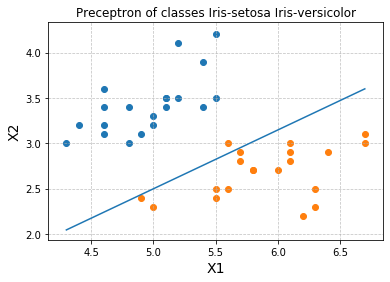

Testing accuracy:
 97.5
Confusion Matrix:
 [[19  1]
 [ 0 20]]


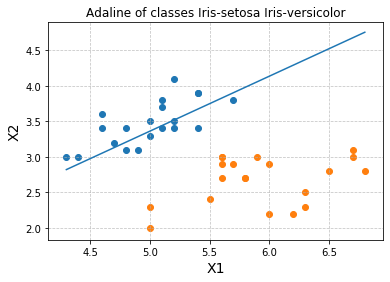

Testing accuracy:
 80.0
Confusion Matrix:
 [[20  0]
 [ 8 12]]


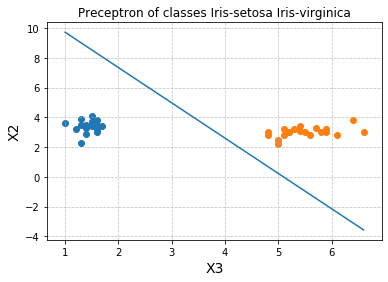

Testing accuracy:
 100.0
Confusion Matrix:
 [[20  0]
 [ 0 20]]


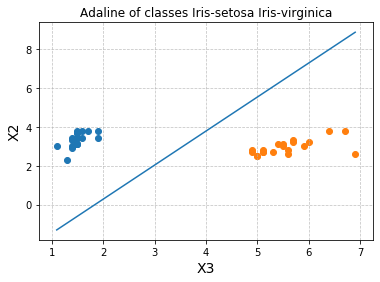

Testing accuracy:
 100.0
Confusion Matrix:
 [[20  0]
 [ 0 20]]


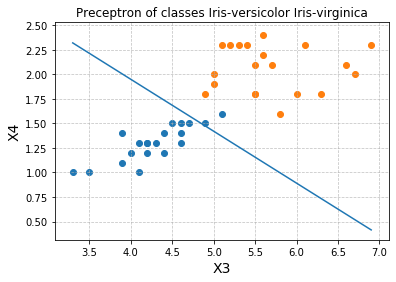

Testing accuracy:
 95.0
Confusion Matrix:
 [[20  0]
 [ 2 18]]


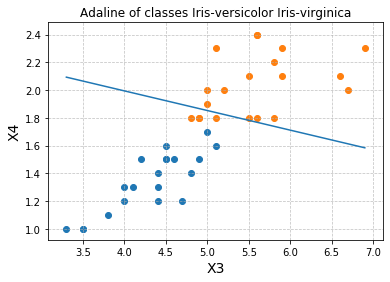

Testing accuracy:
 90.0
Confusion Matrix:
 [[16  4]
 [ 0 20]]


In [125]:
input_window.mainloop() #open window